**Table of contents**<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Task](#toc2_)    
- [Load](#toc3_)    
- [Конверсии в 3 олимпиадах](#toc4_)    
- [Уники](#toc5_)    
  - [Доля старых учеников](#toc5_1_)    
- [Абитуриенты](#toc6_)    
  - [Процент на момент проведения](#toc6_1_)    
  - [После подачи заявки, кол-во](#toc6_2_)    
  - [Общая доля от всех заявок по классам](#toc6_3_)    
- [Вдаль](#toc7_)    
- [Профили в 3 олимпиадах](#toc8_)    
  - [Тесты](#toc8_1_)    
  - [ОЗ](#toc8_2_)    
  - [Курсы](#toc8_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Imports](#toc0_)

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from plotly import graph_objects as go
import plotly.io as pio

pio.renderers.default = "notebook_connected"

#from sqlalchemy import create_engine
#import ast

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 22

sns.set_style('darkgrid')
palette_dict = {1:'orange', 0: 'grey'}

# <a id='toc2_'></a>[Task](#toc0_)

__Сводная аналитика по профилям участников олимпиад 2022-2023__

1. Сравнить общие конверсии в 3 олимпиадах (Кэрролла (38), Терра инкогнита(79) и Гесса (39):
    - заявки/приступили к решению 1 этапа/вышли в финал/участвовали в финале
    - абсолютные цифры
    - в процентах

2. В Кэрролла и Гесса показать долю тех, кто участвовал в прошлом году (2021-2022) по всей воронке.

3. Доля абитуриентов в Летово по 3 олимпиадам на момент проведения олимпиад:
    - заявки/приступившие
    - участвовали в финале (по Гесса - приглашены в финал)

4. Количество абитуриентов, подавших заявку на поступление в Летово после подачи заявки на олимпиаду. Дополнительно показать участников Кэрролла и Терра, подавших заявку на поступление после завершения олимпиад.

5. Ретеншн участников олимпиады Вдаль (37) (она была летом): логин на платформе с 01.09.2022, активности в тестах, ОЗ и курсах (УАП-1 без заявок в школу). Дополнительно: сколько участников Вдаль подали заявку на Терра инкогнита.

6. Профили участников олимпиад Кэрролла, Гесса и Терра инкогнита:
    - активность в тестах (Начали/закончили хотя бы один тест)
    - активность в ОЗ (кол-во правильно решенных заданий, % правильно решенных, кол-во предметов)
    - активность в курсах (подал заявку/приступил/закончил хотя бы в одном курсе кроме этих трех олимп (38, 39, 79).)



# <a id='toc3_'></a>[Load](#toc0_)

In [2]:
apps = pd.read_csv('olimpiad_apps.csv', parse_dates=['created_at'])
display(apps.info())
apps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lo_id           9517 non-null   int64         
 1   course_app_id   9517 non-null   int64         
 2   course_name     9517 non-null   object        
 3   created_at      9517 non-null   datetime64[ns]
 4   finalist        9517 non-null   int64         
 5   course_started  9517 non-null   int64         
 6   last_year_part  9517 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 520.6+ KB


None

,lo_id,course_app_id,course_name,created_at,finalist,course_started,last_year_part
0,458391,10430,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:22,0,0,0
1,577260,10431,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:29,0,0,0
2,527982,10446,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:44:00,0,1,1
3,572536,10456,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:27:29,1,1,1
4,604868,10458,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:49:04,0,1,0
...,...,...,...,...,...,...,...
9512,651857,35599,Химическая олимпиада им. Г. Гесса,2023-01-10 10:16:39,0,0,0
9513,651860,35600,Химическая олимпиада им. Г. Гесса,2023-01-10 10:25:46,0,0,0
9514,651861,35601,Химическая олимпиада им. Г. Гесса,2023-01-10 10:27:57,0,0,0
9515,651864,35602,Химическая олимпиада им. Г. Гесса,2023-01-10 10:40:19,0,0,0


In [3]:
apps.groupby('course_name')['finalist'].value_counts()

course_name                                       finalist
Лингвистическая олимпиада Л. Кэрролла             0           5962
                                                  1            269
Социально-гуманитарная олимпиада Terra incognita  0            672
                                                  1             63
Химическая олимпиада им. Г. Гесса                 0           2485
                                                  1             66
Name: count, dtype: int64

In [4]:
olymp_names = apps.course_name.unique().tolist()
olymp_names

['Лингвистическая олимпиада Л. Кэрролла',
 'Социально-гуманитарная олимпиада Terra incognita',
 'Химическая олимпиада им. Г. Гесса']

In [5]:
olymp_file_names = ['carrol', 'terra', 'gessa']

ls = []
for f_name, name in zip(olymp_file_names, olymp_names):
    data = pd.read_csv(f_name + '_fin.csv')
    data['course_name'] = name
    ls.append(data)

finalists = pd.concat(ls)
finalists
    


,lo_id,final_appeared,course_name
0,383221,1,Лингвистическая олимпиада Л. Кэрролла
1,387007,1,Лингвистическая олимпиада Л. Кэрролла
2,419761,1,Лингвистическая олимпиада Л. Кэрролла
3,427307,1,Лингвистическая олимпиада Л. Кэрролла
4,429193,1,Лингвистическая олимпиада Л. Кэрролла
...,...,...,...
60,649057,1,Химическая олимпиада им. Г. Гесса
61,650328,1,Химическая олимпиада им. Г. Гесса
62,650345,1,Химическая олимпиада им. Г. Гесса
63,651235,1,Химическая олимпиада им. Г. Гесса


In [6]:
apps = apps.merge(finalists, on=['lo_id', 'course_name'], how='left')
apps['final_appeared'] = apps['final_appeared'].fillna(0).astype('int')
apps


,lo_id,course_app_id,course_name,created_at,finalist,course_started,last_year_part,final_appeared
0,458391,10430,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:22,0,0,0,0
1,577260,10431,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:29,0,0,0,0
2,527982,10446,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:44:00,0,1,1,0
3,572536,10456,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:27:29,1,1,1,1
4,604868,10458,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:49:04,0,1,0,0
...,...,...,...,...,...,...,...,...
9512,651857,35599,Химическая олимпиада им. Г. Гесса,2023-01-10 10:16:39,0,0,0,0
9513,651860,35600,Химическая олимпиада им. Г. Гесса,2023-01-10 10:25:46,0,0,0,0
9514,651861,35601,Химическая олимпиада им. Г. Гесса,2023-01-10 10:27:57,0,0,0,0
9515,651864,35602,Химическая олимпиада им. Г. Гесса,2023-01-10 10:40:19,0,0,0,0


In [7]:
users = pd.read_csv('users_activity1.csv', parse_dates=['school_app_sent_at'])
users['test_start'] = 0
users.loc[users['test_fin'].notna(), 'test_start'] = 1
users['one_oz_solved'] = 0
users.loc[users['five_oz_solved'].notna(), 'one_oz_solved'] = 1
users

,lo_id,grade,school_app_sent,school_app_sent_at,old_user,test_fin,five_oz_solved,at_least_one_course_les,course_comp,uap_1,uap_2,test_start,one_oz_solved
0,458391,8,NaN,NaT,1,1.0,1.0,0.0,NaN,1,1,1,1
1,577260,7,NaN,NaT,1,1.0,0.0,1.0,NaN,1,1,1,1
2,527982,8,1.0,2022-09-29 17:31:48,1,1.0,1.0,1.0,1.0,1,1,1,1
3,572536,8,1.0,2022-09-28 10:23:19,1,1.0,1.0,1.0,1.0,1,1,1,1
4,572536,8,1.0,2022-10-16 16:47:59,1,1.0,1.0,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378,651857,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9379,651860,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9380,651861,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9381,651864,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0


In [8]:
users.test_start.sum()

4100

In [9]:
users.test_fin.sum()

2365.0

In [10]:
olymp_names

['Лингвистическая олимпиада Л. Кэрролла',
 'Социально-гуманитарная олимпиада Terra incognita',
 'Химическая олимпиада им. Г. Гесса']

In [11]:
olymp_app_start = ['2022-09-12', '2022-10-17', '2022-11-01']
olymp_start = ['2022-10-03', '2022-11-01', '2022-11-15']
olymp_end = ['2022-12-15 23:59:59', '2022-12-22 23:59:59' ,'2023-03-26 23:59:59']

olymp_dates = pd.DataFrame(data=[olymp_app_start, olymp_start, olymp_end], 
                           columns=['app_start', 'olymp_start', 'olymp_end'], 
                           index=olymp_names,
                           dtype='datetime64[ns]')
olymp_dates.index.name='course_name'
olymp_dates

,app_start,olymp_start,olymp_end
course_name,,,
Лингвистическая олимпиада Л. Кэрролла,2022-09-12 00:00:00,2022-10-17 00:00:00,2022-11-01 00:00:00
Социально-гуманитарная олимпиада Terra incognita,2022-10-03 00:00:00,2022-11-01 00:00:00,2022-11-15 00:00:00
Химическая олимпиада им. Г. Гесса,2022-12-15 23:59:59,2022-12-22 23:59:59,2023-03-26 23:59:59


# <a id='toc4_'></a>[Конверсии в 3 олимпиадах](#toc0_)

In [12]:
funnel = apps.groupby('course_name').agg({'lo_id':'count', 'course_started':'sum', 'finalist':'sum', 'final_appeared':'sum'})
funnel.columns = ['Подали заявку', 'Приступили', 'Вышли в финал', 'Участвовали в финале']
funnel

,Подали заявку,Приступили,Вышли в финал,Участвовали в финале
course_name,,,,
Лингвистическая олимпиада Л. Кэрролла,6231,3343,269,203
Социально-гуманитарная олимпиада Terra incognita,735,295,63,40
Химическая олимпиада им. Г. Гесса,2551,1072,66,65


In [13]:


for name in olymp_names:
    fig = go.Figure()
    fig.add_trace(go.Funnel(
        name = name,
        x = funnel.columns,
        y = funnel.loc[name,:],
        orientation='v',
        textinfo = "value+percent previous",
        marker={"color": ['seagreen','skyblue','orange','salmon']}),
      )
    fig.update_layout(title=name)
    fig.show()


# <a id='toc5_'></a>[Уники](#toc0_)

In [14]:
apps

,lo_id,course_app_id,course_name,created_at,finalist,course_started,last_year_part,final_appeared
0,458391,10430,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:22,0,0,0,0
1,577260,10431,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:29,0,0,0,0
2,527982,10446,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:44:00,0,1,1,0
3,572536,10456,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:27:29,1,1,1,1
4,604868,10458,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 11:49:04,0,1,0,0
...,...,...,...,...,...,...,...,...
9512,651857,35599,Химическая олимпиада им. Г. Гесса,2023-01-10 10:16:39,0,0,0,0
9513,651860,35600,Химическая олимпиада им. Г. Гесса,2023-01-10 10:25:46,0,0,0,0
9514,651861,35601,Химическая олимпиада им. Г. Гесса,2023-01-10 10:27:57,0,0,0,0
9515,651864,35602,Химическая олимпиада им. Г. Гесса,2023-01-10 10:40:19,0,0,0,0


In [15]:
unique_users = apps['lo_id'].nunique()
unique_users_start = apps[apps['course_started'] == 1]['lo_id'].nunique()
unique_users_fin = apps[apps['finalist'] == 1]['lo_id'].nunique()
unique_users_fin_app = apps[apps['final_appeared'] == 1]['lo_id'].nunique()
names = ['Подали заявку', 'Приступили', 'Вышли в финал', 'Участвовали в финале']
ls_unique = [unique_users, unique_users_start, unique_users_fin, unique_users_fin_app]

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = name,
    x = names,
    y = ls_unique,
    orientation='v',
    textinfo = "value+percent previous",
    marker={"color": ['seagreen','skyblue','orange','salmon']}),
    )
fig.update_layout(title='Уникальные пользователи по трем олимпиадам')
fig.show()


## <a id='toc5_1_'></a>[Доля старых учеников](#toc0_)

,Подали заявку,Приступили,Вышли в финал,Участвовали в финале
course_name,,,,
Лингвистическая олимпиада Л. Кэрролла,438,276,49,41
Социально-гуманитарная олимпиада Terra incognita,0,0,0,0
Химическая олимпиада им. Г. Гесса,74,53,13,13


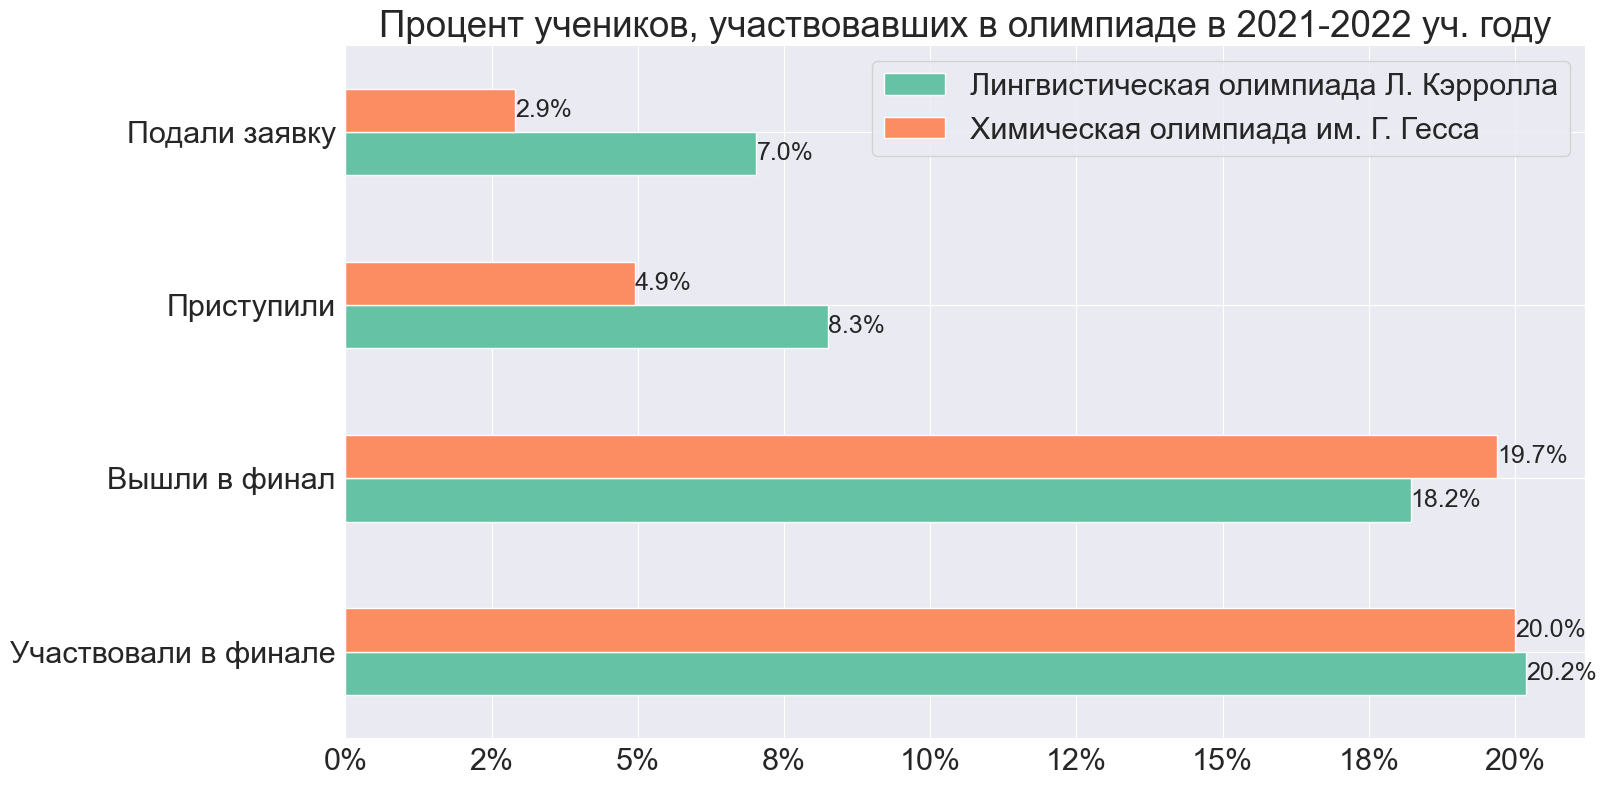

In [16]:
def plot_binary_percantage_across_funnel(df, funnel, bin_col, drop_cols=None, title='', legend_labels=None):
    df_old = df.groupby('course_name')[bin_col].sum()
    df_old.name = 'Подали заявку'

    started_old = df[df['course_started'] == 1].groupby('course_name')[bin_col].sum()
    started_old.name = 'Приступили'

    fin_old = df[df['finalist'] == 1].groupby('course_name')[bin_col].sum()
    fin_old.name = 'Вышли в финал'

    fin_app_old = df[df['final_appeared'] == 1].groupby('course_name')[bin_col].sum()
    fin_app_old.name = 'Участвовали в финале'
    fin_app_old
    ls = [df_old, started_old, fin_old, fin_app_old]
    funnel_old = pd.concat(ls, axis=1)
    display(funnel_old)

    sns.set_palette('Set2')
    funnel_proportion_old = (funnel_old / funnel).T
    if drop_cols:
        funnel_proportion_old = funnel_proportion_old.drop(columns=drop_cols)
    

    ax = funnel_proportion_old.loc[::-1].plot(kind='barh')
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
    ax.set(title=title)
    handles, labels = ax.get_legend_handles_labels()
    if legend_labels:
        labels = legend_labels
    ax.legend(handles, labels, title='')

    for i in range(funnel_proportion_old.shape[1]):
        ax.bar_label(ax.containers[i], [f'{x.get_width():.1%}' for x in ax.containers[i]], fontsize=18)
    plt.show()

plot_binary_percantage_across_funnel(df=apps, funnel=funnel, bin_col='last_year_part', 
    drop_cols=['Социально-гуманитарная олимпиада Terra incognita'],
    title='Процент учеников, участвовавших в олимпиаде в 2021-2022 уч. году')

In [17]:
def barplot_binary(data: pd.DataFrame, x: str, y: str, estimator_type='percent', orient: str='v',
    title=None, xlabel=None, ylabel=None,
    hue: str=None, ticklabels: list=None, palette='Set2', 
    hue_legend_labels: list=None, hue_legend_title: str=None):
    if estimator_type == 'percent':
      estimator = np.mean
    if estimator_type == 'sum':
      estimator = np.sum
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, ci=0, palette=palette, estimator=estimator)
    if estimator_type == 'percent':
      if orient == 'v':
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
      if orient == 'h':
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))


    if ticklabels:
        ax.set_xticklabels(ticklabels)

    if hue_legend_labels:
        handles, labels = ax.get_legend_handles_labels()
        labels = hue_legend_labels
        ax.legend(handles, labels, title=hue_legend_title)
    if title or xlabel or ylabel:
      ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    if estimator_type == 'percent':
      if orient == 'v':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_height():.1%}' for x in ax.containers[i]])
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_height():.1%}' for x in ax.containers[0]])
      if orient == 'h':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_width():.1%}' for x in ax.containers[i]])
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_width():.1%}' for x in ax.containers[0]])
    
    if estimator_type == 'sum':
      if orient == 'v':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_height():.0f}' for x in ax.containers[i]])
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_height():.0f}' for x in ax.containers[0]])
      if orient == 'h':
        if hue:
          hue_size = data[hue].nunique()
          for i in range(hue_size):
            ax.bar_label(ax.containers[i], labels = [f'{x.get_width():.0f}' for x in ax.containers[i]])
        else:
          ax.bar_label(ax.containers[0], labels = [f'{x.get_width():.0f}' for x in ax.containers[0]])

    return ax

# <a id='toc6_'></a>[Абитуриенты](#toc0_)

## <a id='toc6_1_'></a>[Процент на момент проведения](#toc0_)

In [18]:
df = apps.merge(olymp_dates, on='course_name').merge(users, on='lo_id')
df

,lo_id,course_app_id,course_name,created_at,finalist,course_started,last_year_part,final_appeared,app_start,olymp_start,...,school_app_sent_at,old_user,test_fin,five_oz_solved,at_least_one_course_les,course_comp,uap_1,uap_2,test_start,one_oz_solved
0,458391,10430,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:22,0,0,0,0,2022-09-12 00:00:00,2022-10-17 00:00:00,...,NaT,1,1.0,1.0,0.0,NaN,1,1,1,1
1,577260,10431,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:16:29,0,0,0,0,2022-09-12 00:00:00,2022-10-17 00:00:00,...,NaT,1,1.0,0.0,1.0,NaN,1,1,1,1
2,577260,23659,Социально-гуманитарная олимпиада Terra incognita,2022-10-27 17:46:03,1,0,0,0,2022-10-03 00:00:00,2022-11-01 00:00:00,...,NaT,1,1.0,0.0,1.0,NaN,1,1,1,1
3,577260,25145,Химическая олимпиада им. Г. Гесса,2022-11-01 14:27:42,0,0,0,0,2022-12-15 23:59:59,2022-12-22 23:59:59,...,NaT,1,1.0,0.0,1.0,NaN,1,1,1,1
4,527982,10446,Лингвистическая олимпиада Л. Кэрролла,2022-09-12 10:44:00,0,1,1,0,2022-09-12 00:00:00,2022-10-17 00:00:00,...,2022-09-29 17:31:48,1,1.0,1.0,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053,651857,35599,Химическая олимпиада им. Г. Гесса,2023-01-10 10:16:39,0,0,0,0,2022-12-15 23:59:59,2022-12-22 23:59:59,...,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
10054,651860,35600,Химическая олимпиада им. Г. Гесса,2023-01-10 10:25:46,0,0,0,0,2022-12-15 23:59:59,2022-12-22 23:59:59,...,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
10055,651861,35601,Химическая олимпиада им. Г. Гесса,2023-01-10 10:27:57,0,0,0,0,2022-12-15 23:59:59,2022-12-22 23:59:59,...,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
10056,651864,35602,Химическая олимпиада им. Г. Гесса,2023-01-10 10:40:19,0,0,0,0,2022-12-15 23:59:59,2022-12-22 23:59:59,...,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0


In [19]:
df['school_app_during_olymp'] = 0
df.loc[(df['school_app_sent_at'] >= df['olymp_start']) & (df['school_app_sent_at'] <= df['olymp_end']), 'school_app_during_olymp'] = 1
df.groupby('course_name')['school_app_during_olymp'].sum()

course_name
Лингвистическая олимпиада Л. Кэрролла               220
Социально-гуманитарная олимпиада Terra incognita     74
Химическая олимпиада им. Г. Гесса                    65
Name: school_app_during_olymp, dtype: int64

,Подали заявку,Приступили,Вышли в финал,Участвовали в финале
course_name,,,,
Лингвистическая олимпиада Л. Кэрролла,220,141,23,20
Социально-гуманитарная олимпиада Terra incognita,74,37,12,7
Химическая олимпиада им. Г. Гесса,65,35,5,5


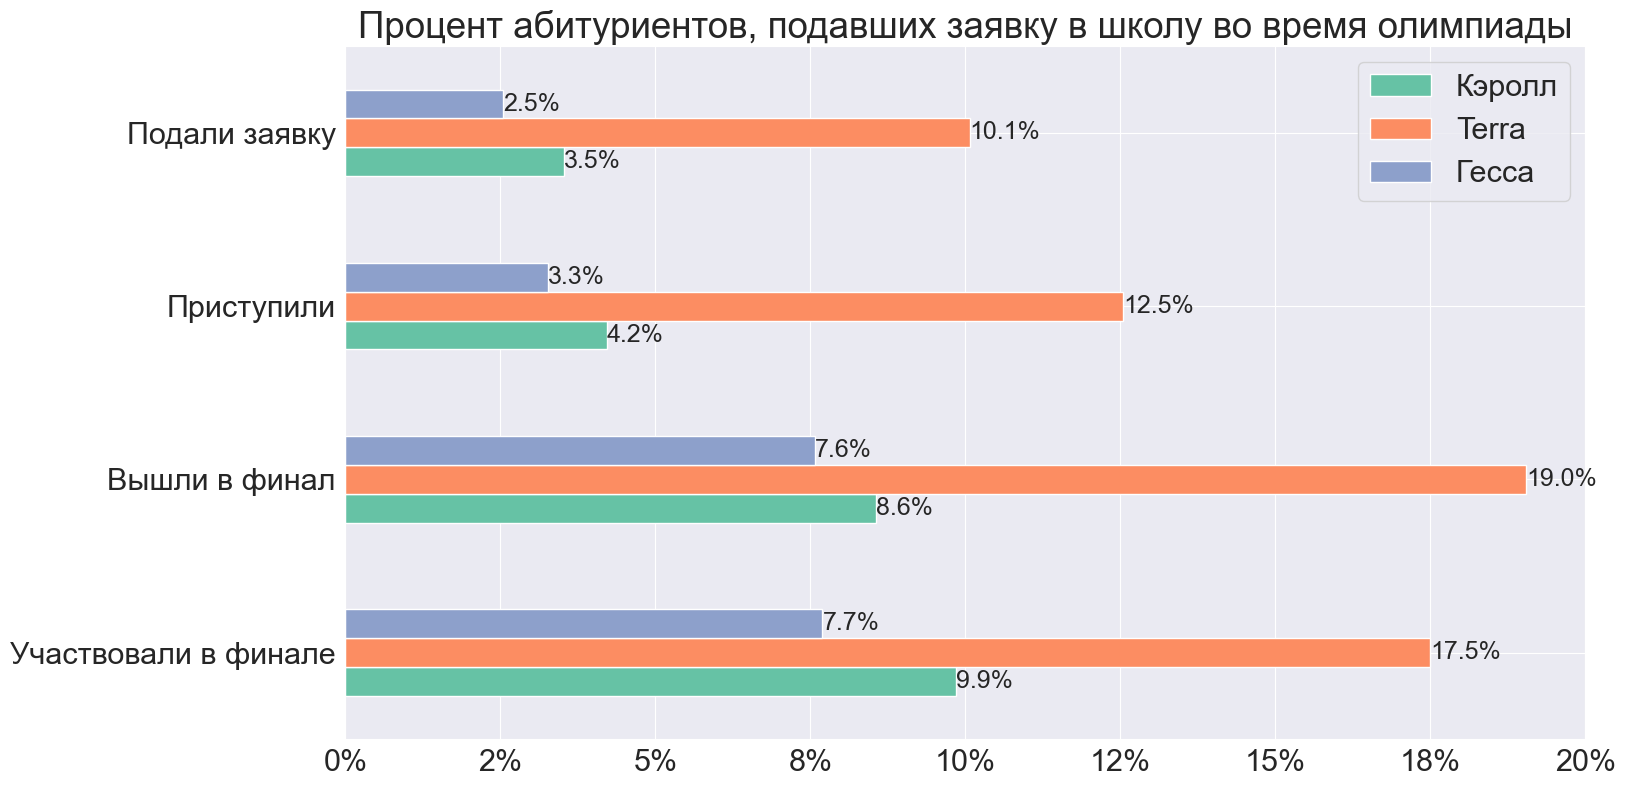

In [20]:
plot_binary_percantage_across_funnel(df=df, funnel=funnel, bin_col='school_app_during_olymp', 
    title='Процент абитуриентов, подавших заявку в школу во время олимпиады', 
    legend_labels=['Кэролл', 'Terra', 'Гесса'])

## <a id='toc6_2_'></a>[После подачи заявки, кол-во](#toc0_)

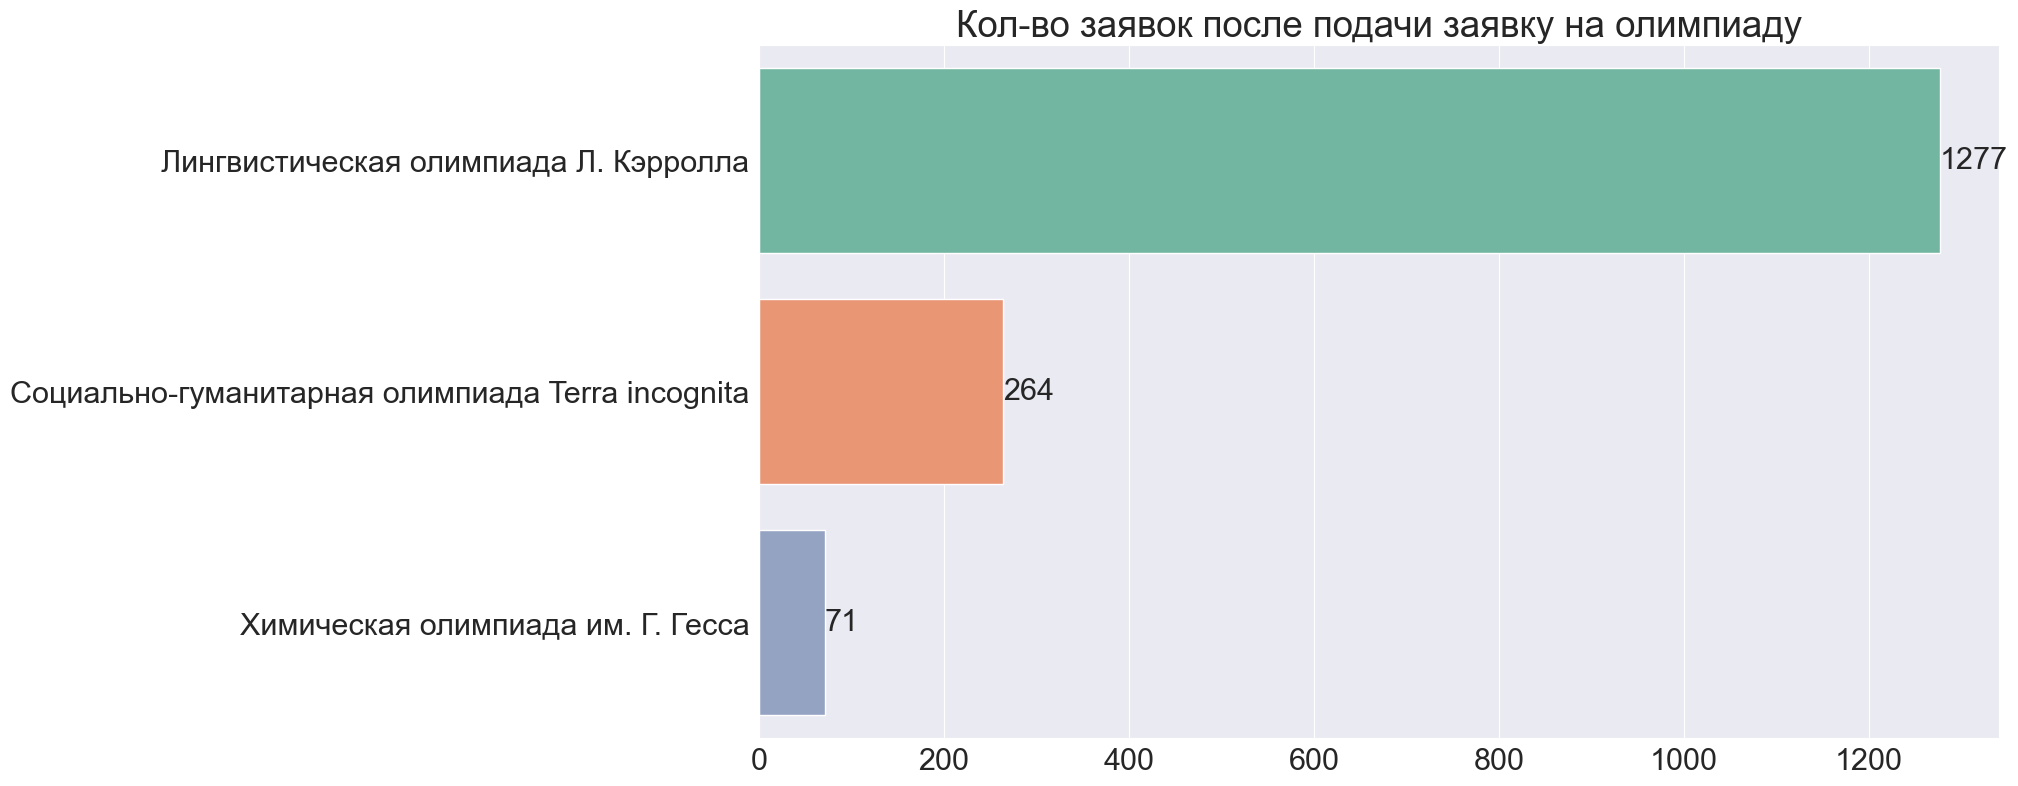

In [21]:
df['school_app_after_olymp_app'] = 0
df.loc[df['school_app_sent_at'] >= df['app_start'], 'school_app_after_olymp_app'] = 1
barplot_binary(df, y='course_name', x='school_app_after_olymp_app', orient='h', estimator_type='sum',
               title='Кол-во заявок после подачи заявку на олимпиаду')
plt.show()

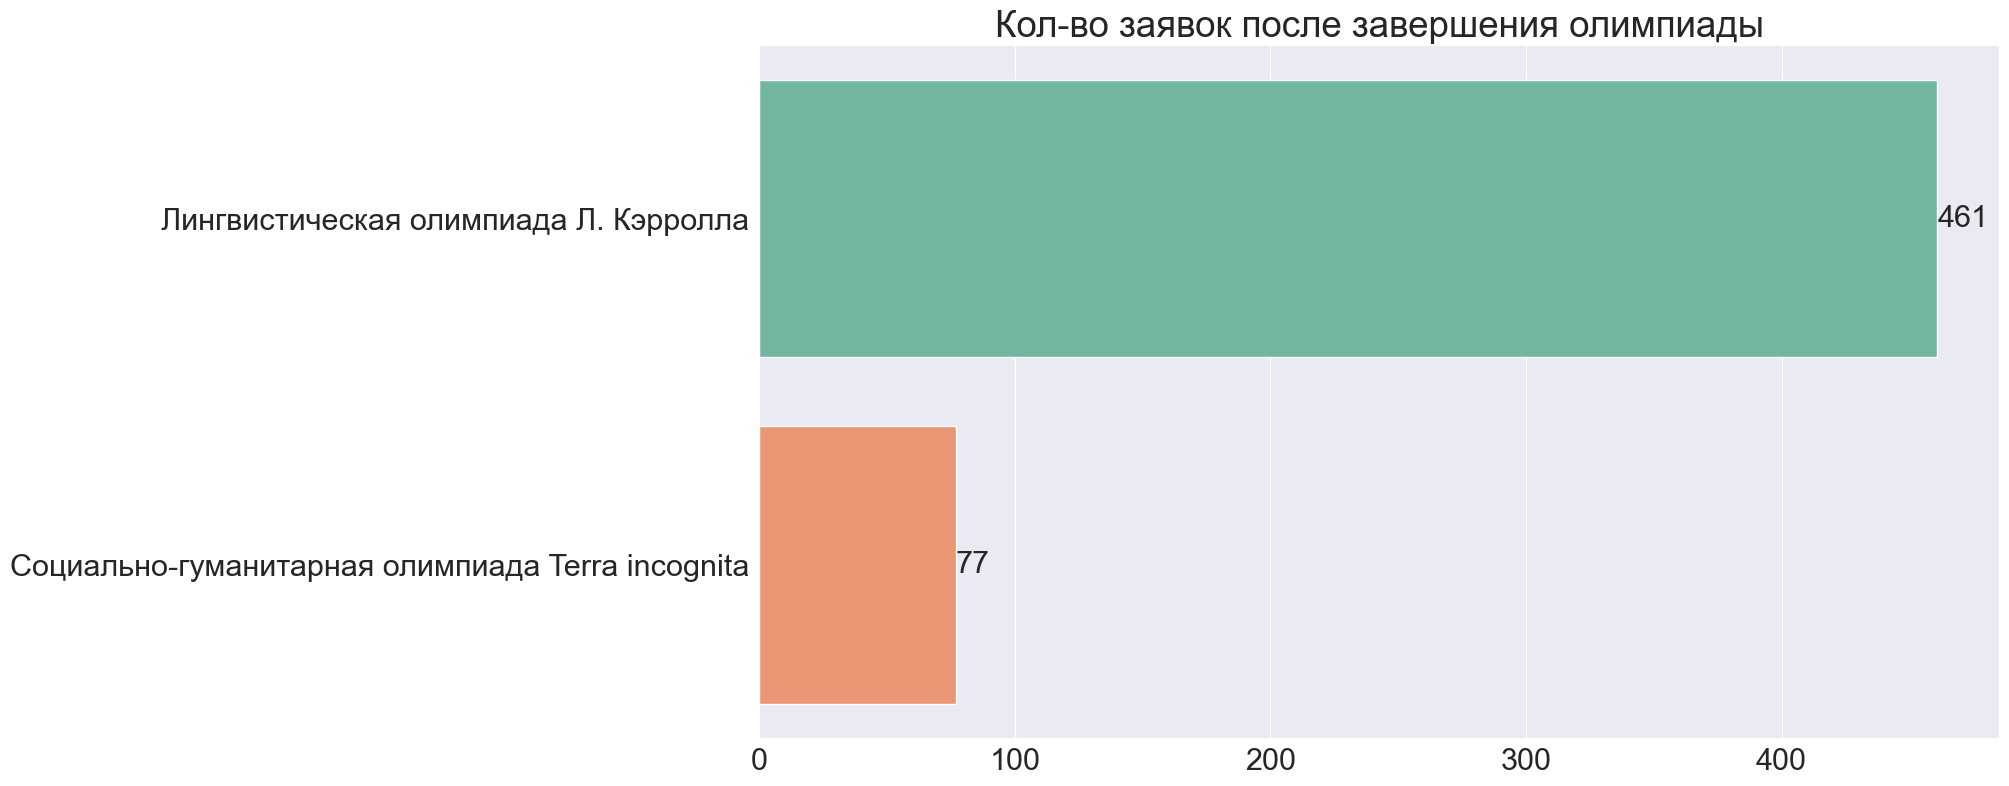

In [22]:
df['school_app_after_olymp_fin'] = 0
df.loc[df['school_app_sent_at'] > df['olymp_end'], 'school_app_after_olymp_fin'] = 1
barplot_binary(df[df['course_name'] != 'Химическая олимпиада им. Г. Гесса'], y='course_name', x='school_app_after_olymp_fin', orient='h', estimator_type='sum',
               title='Кол-во заявок после завершения олимпиады')
plt.show()

## <a id='toc6_3_'></a>[Общая доля от всех заявок по классам](#toc0_)

In [23]:
school_app_prop = pd.read_csv('school_app_proportion.csv')
school_app_prop

,grade,school_app_prop
0,5,0.0488
1,6,0.2328
2,7,0.2454
3,8,0.2441


<Axes: title={'center': 'Процент абитуриентов школы Летово и ЯШ, подавших заявки на олимпиады'}, xlabel='Класс'>

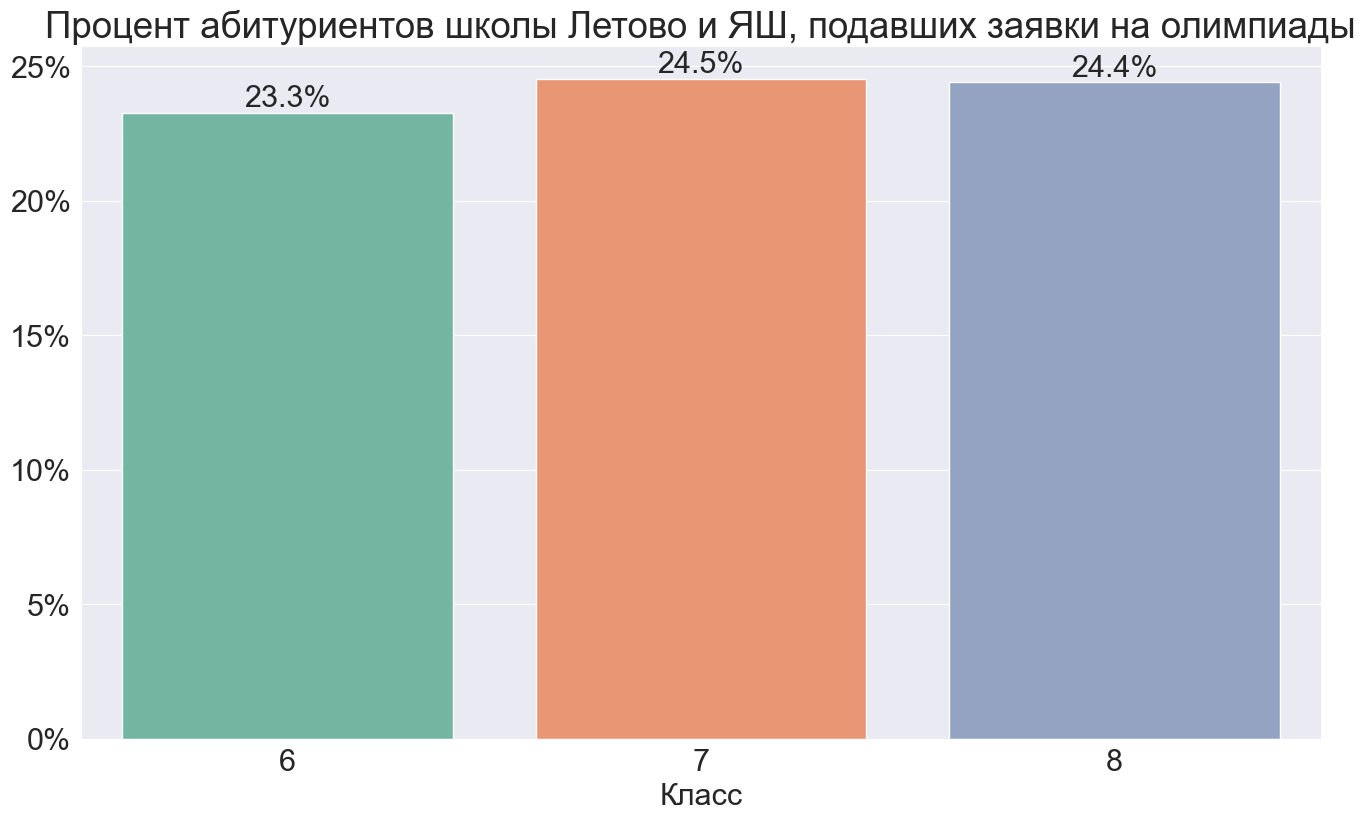

In [24]:
barplot_binary(data=school_app_prop.iloc[1:], x='grade', y='school_app_prop',
               title='Процент абитуриентов школы Летово и ЯШ, подавших заявки на олимпиады',
               xlabel='Класс')

# <a id='toc7_'></a>[Вдаль](#toc0_)

In [25]:
vdal_users = pd.read_csv('vdal_users.csv')
vdal_users

,lo_id,new_year_login
0,577260,1
1,402070,0
2,588355,1
3,549807,1
4,571621,1
...,...,...
1345,559480,1
1346,605055,0
1347,605059,0
1348,560031,0


[Text(0.5, 1.0, 'Логин в новом учебном году для участников Вдаль'),
 Text(0.5, 0, 'Логин в новом уч. году'),
 Text(0, 0.5, 'Кол-во участников')]

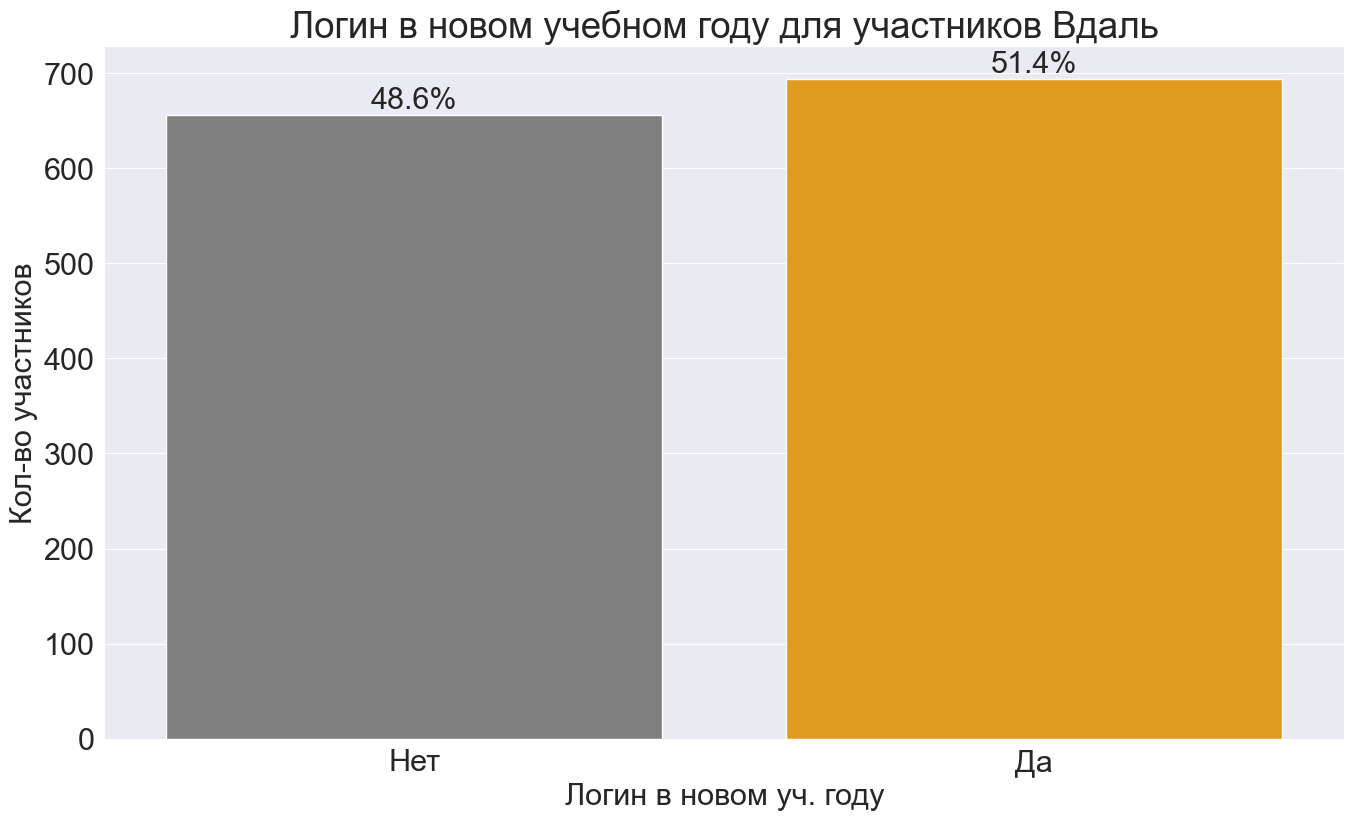

In [26]:
ax = sns.countplot(data=vdal_users, x='new_year_login', palette=palette_dict)
percents = vdal_users['new_year_login'].mean()
ax.bar_label(ax.containers[0], [f'{x:.1%}' for x in [1-percents, percents]])
ax.set_xticklabels(['Нет', 'Да'])
ax.set(title='Логин в новом учебном году для участников Вдаль', xlabel='Логин в новом уч. году', ylabel='Кол-во участников')

# <a id='toc8_'></a>[Профили в 3 олимпиадах](#toc0_)

## <a id='toc8_1_'></a>[Тесты](#toc0_)

<Axes: title={'center': 'Процент учеников, начавших тесты'}>

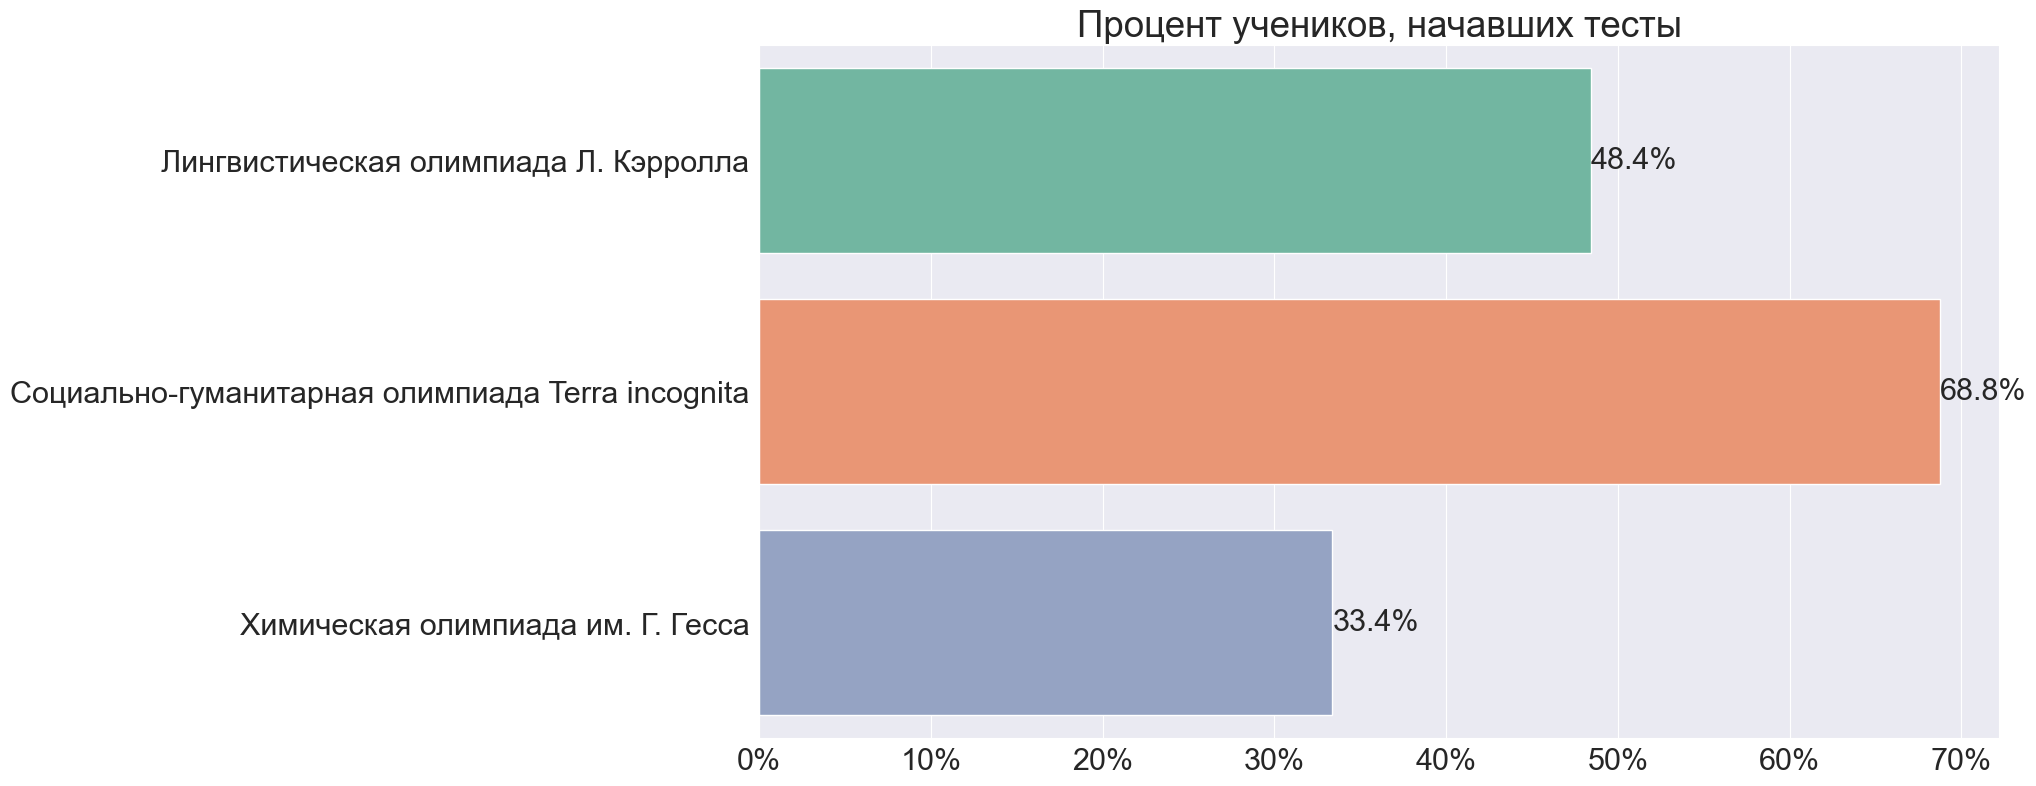

In [27]:
barplot_binary(data=df, y='course_name', x='test_start', orient='h',
               title='Процент учеников, начавших тесты')

<Axes: title={'center': 'Конверсия в завершение тестов'}>

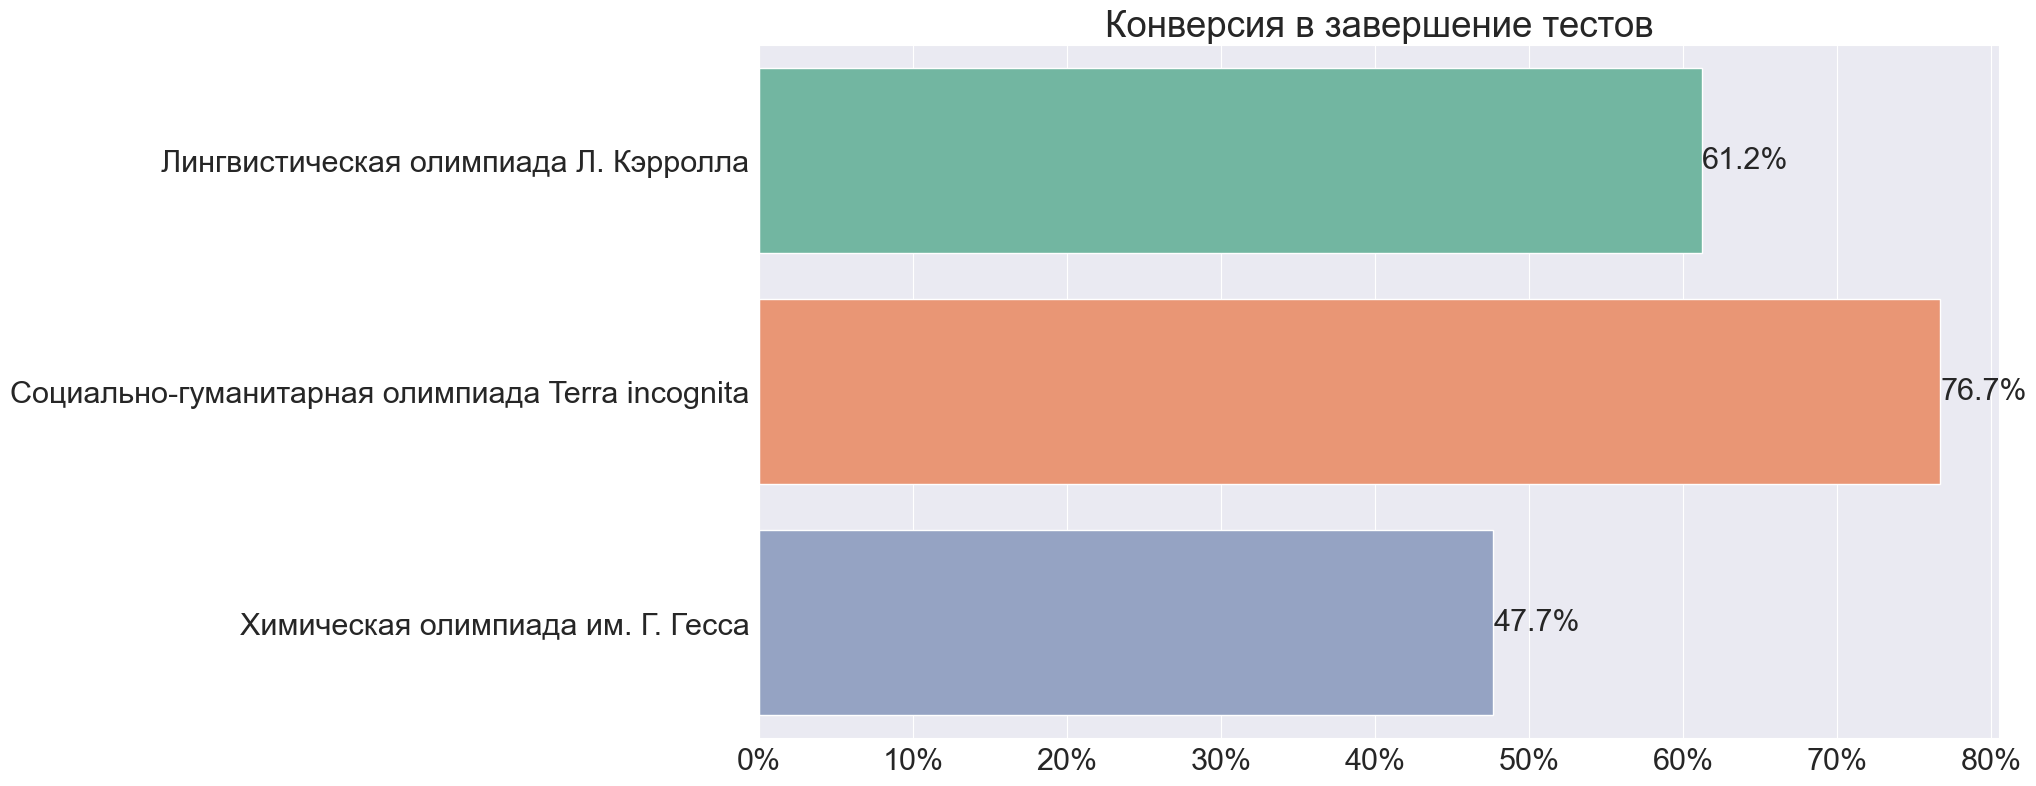

In [28]:
barplot_binary(data=df, y='course_name', x='test_fin', orient='h',
               title='Конверсия в завершение тестов')

## <a id='toc8_2_'></a>[ОЗ](#toc0_)

<Axes: title={'center': 'Процент тех, кто решил хотя бы одно ОЗ'}>

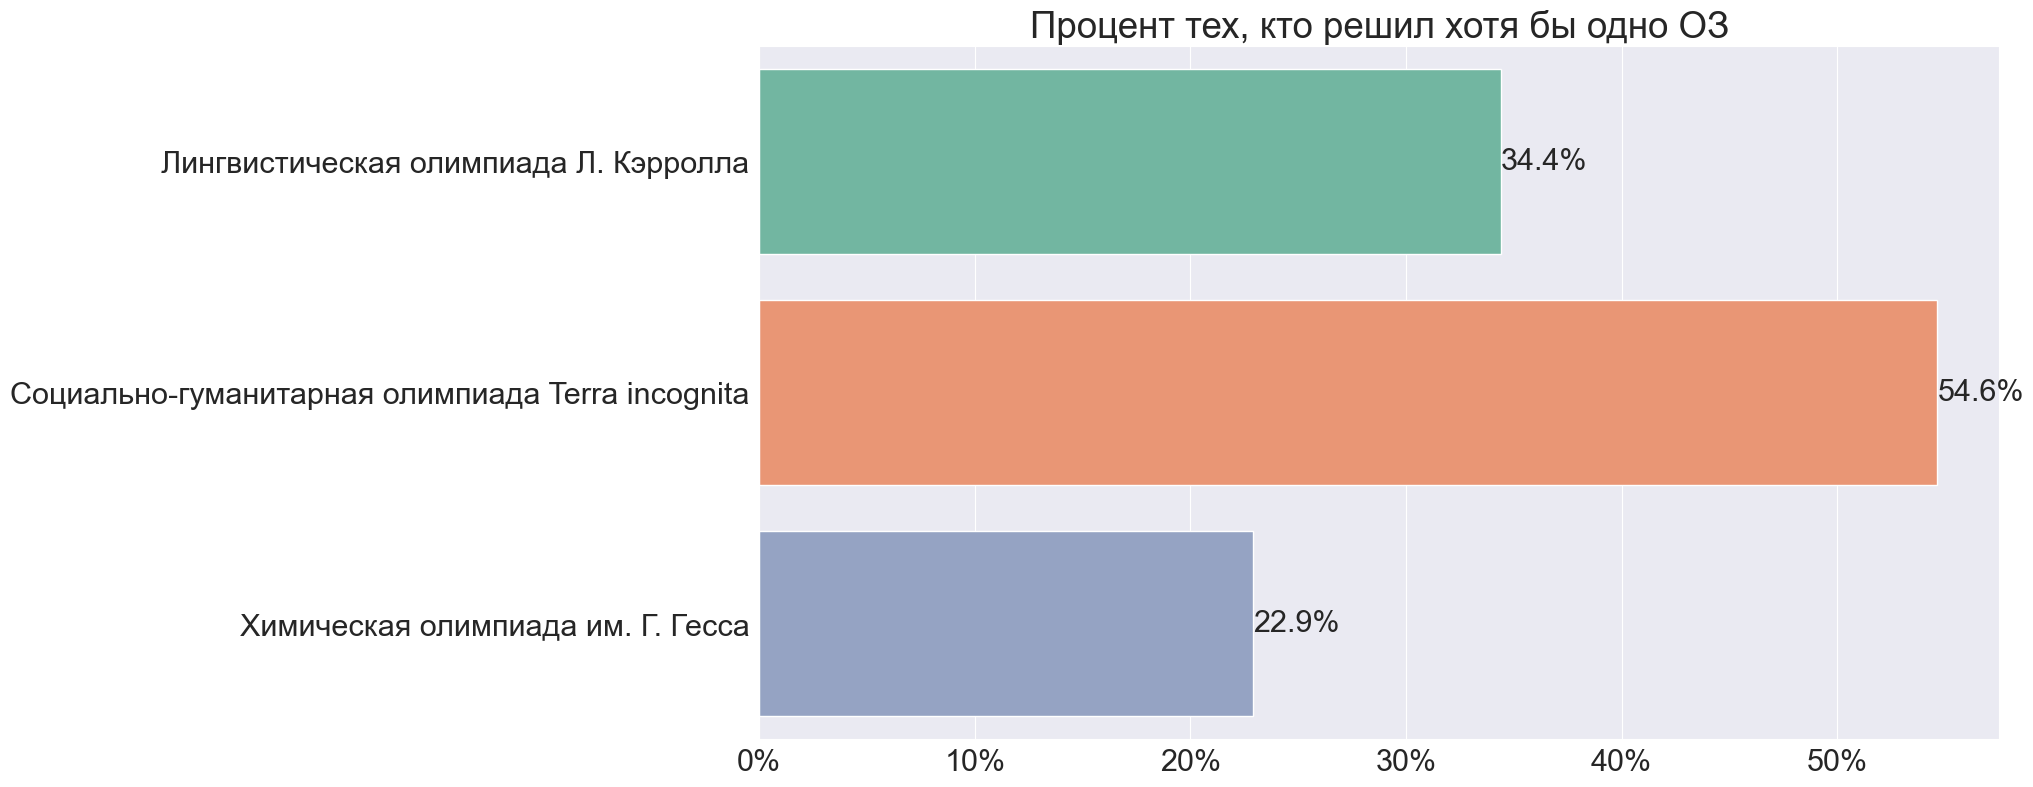

In [29]:
barplot_binary(data=df, y='course_name', x='one_oz_solved', orient='h',
               title='Процент тех, кто решил хотя бы одно ОЗ')

<Axes: title={'center': 'Конверсия в решение 5 ОЗ'}>

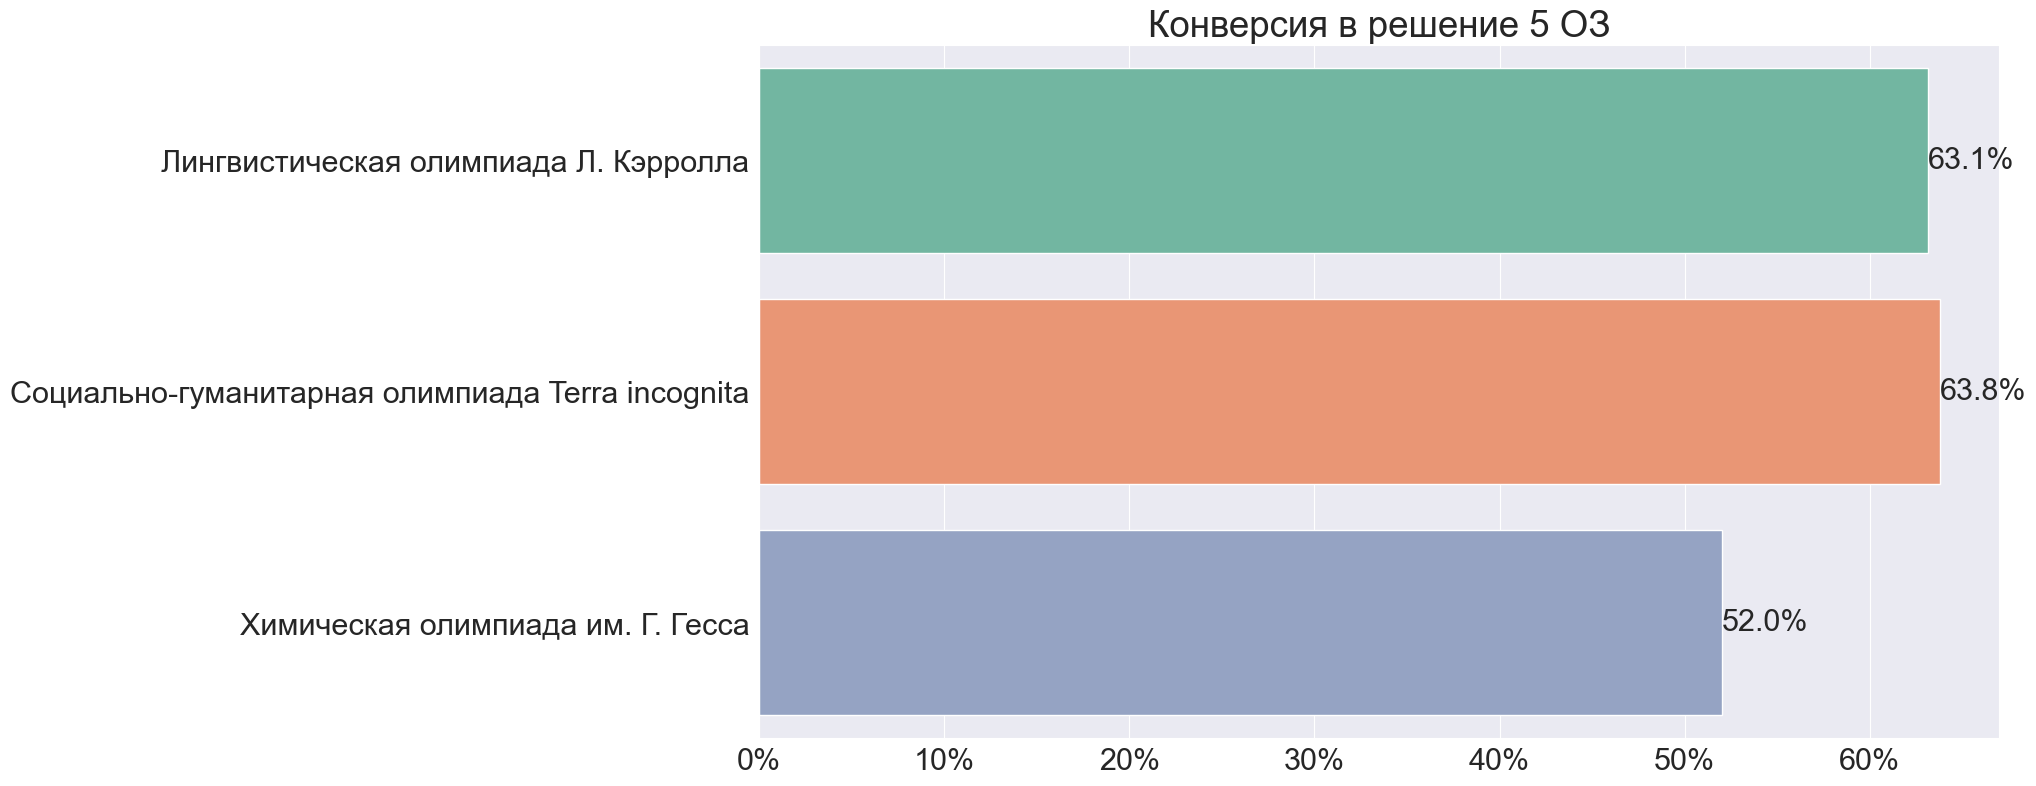

In [30]:
barplot_binary(data=df, y='course_name', x='five_oz_solved', orient='h',
               title='Конверсия в решение 5 ОЗ')

## <a id='toc8_3_'></a>[Курсы](#toc0_)

In [31]:
users

,lo_id,grade,school_app_sent,school_app_sent_at,old_user,test_fin,five_oz_solved,at_least_one_course_les,course_comp,uap_1,uap_2,test_start,one_oz_solved
0,458391,8,NaN,NaT,1,1.0,1.0,0.0,NaN,1,1,1,1
1,577260,7,NaN,NaT,1,1.0,0.0,1.0,NaN,1,1,1,1
2,527982,8,1.0,2022-09-29 17:31:48,1,1.0,1.0,1.0,1.0,1,1,1,1
3,572536,8,1.0,2022-09-28 10:23:19,1,1.0,1.0,1.0,1.0,1,1,1,1
4,572536,8,1.0,2022-10-16 16:47:59,1,1.0,1.0,1.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9378,651857,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9379,651860,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9380,651861,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0
9381,651864,8,NaN,NaT,0,NaN,NaN,NaN,NaN,0,0,0,0


<Axes: title={'center': 'Процент заявок в неолимпиадные курсы'}>

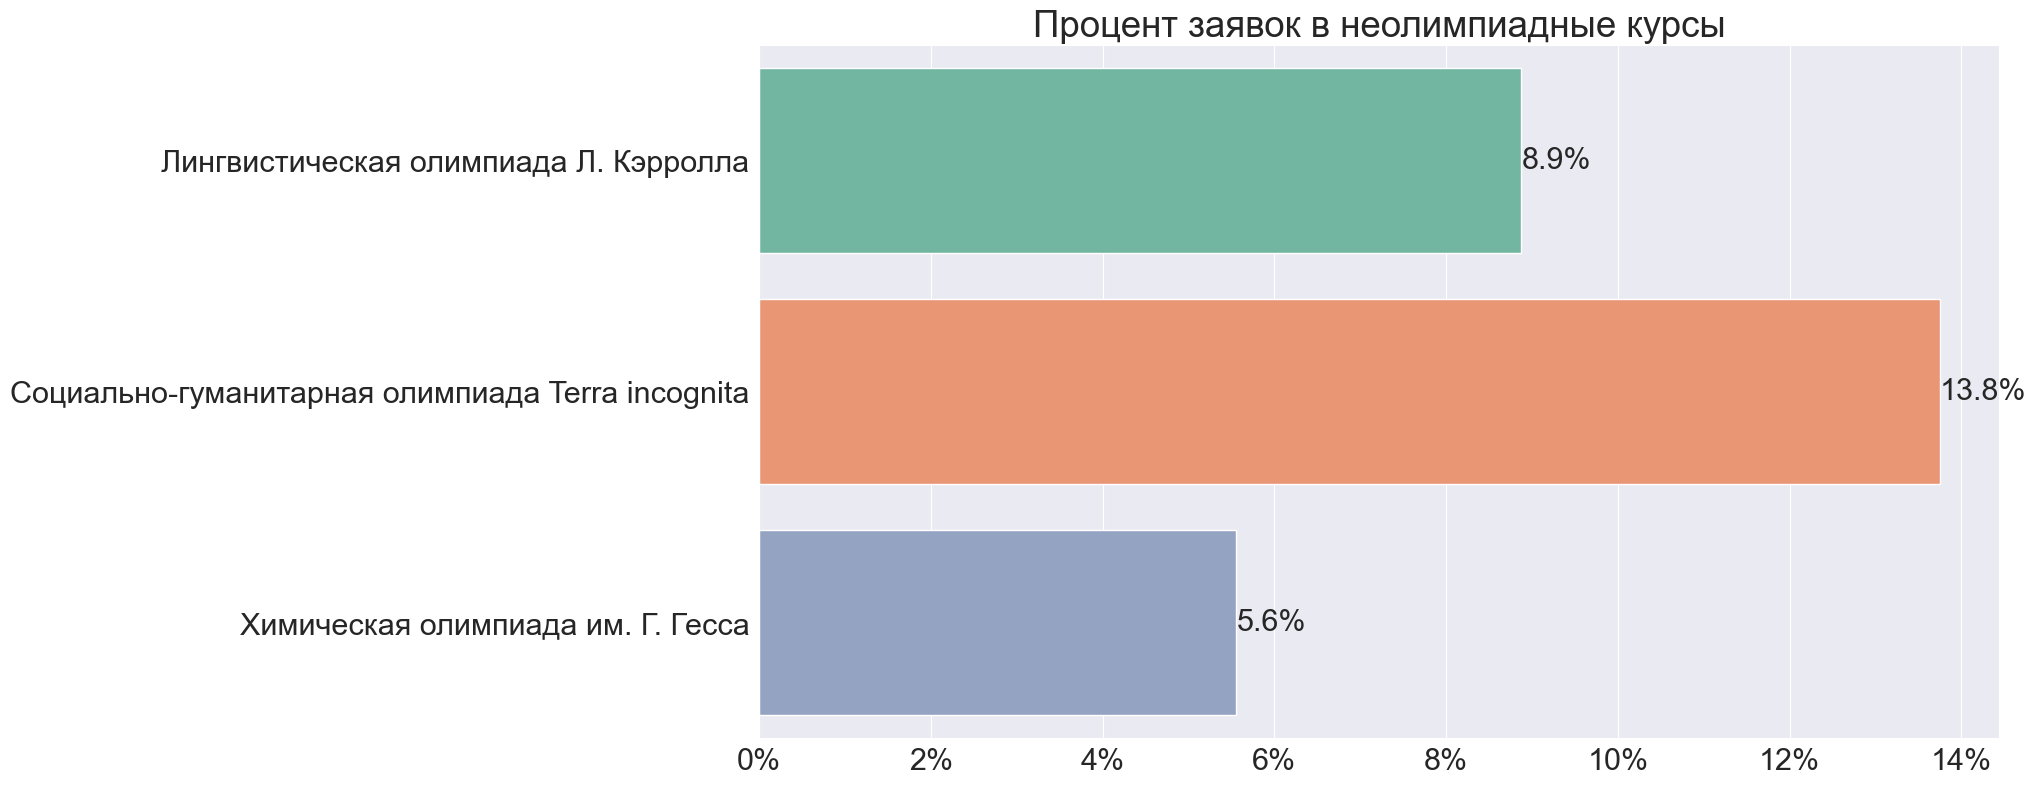

In [32]:
df['other_course_app'] = 0
df.loc[df['at_least_one_course_les'] == 0, 'other_course_app'] = 1

barplot_binary(data=df, y='course_name', x='other_course_app', orient='h',
               title='Процент заявок в неолимпиадные курсы')

<Axes: title={'center': 'Конверсия из заявки на другие курсы в начало занятий'}>

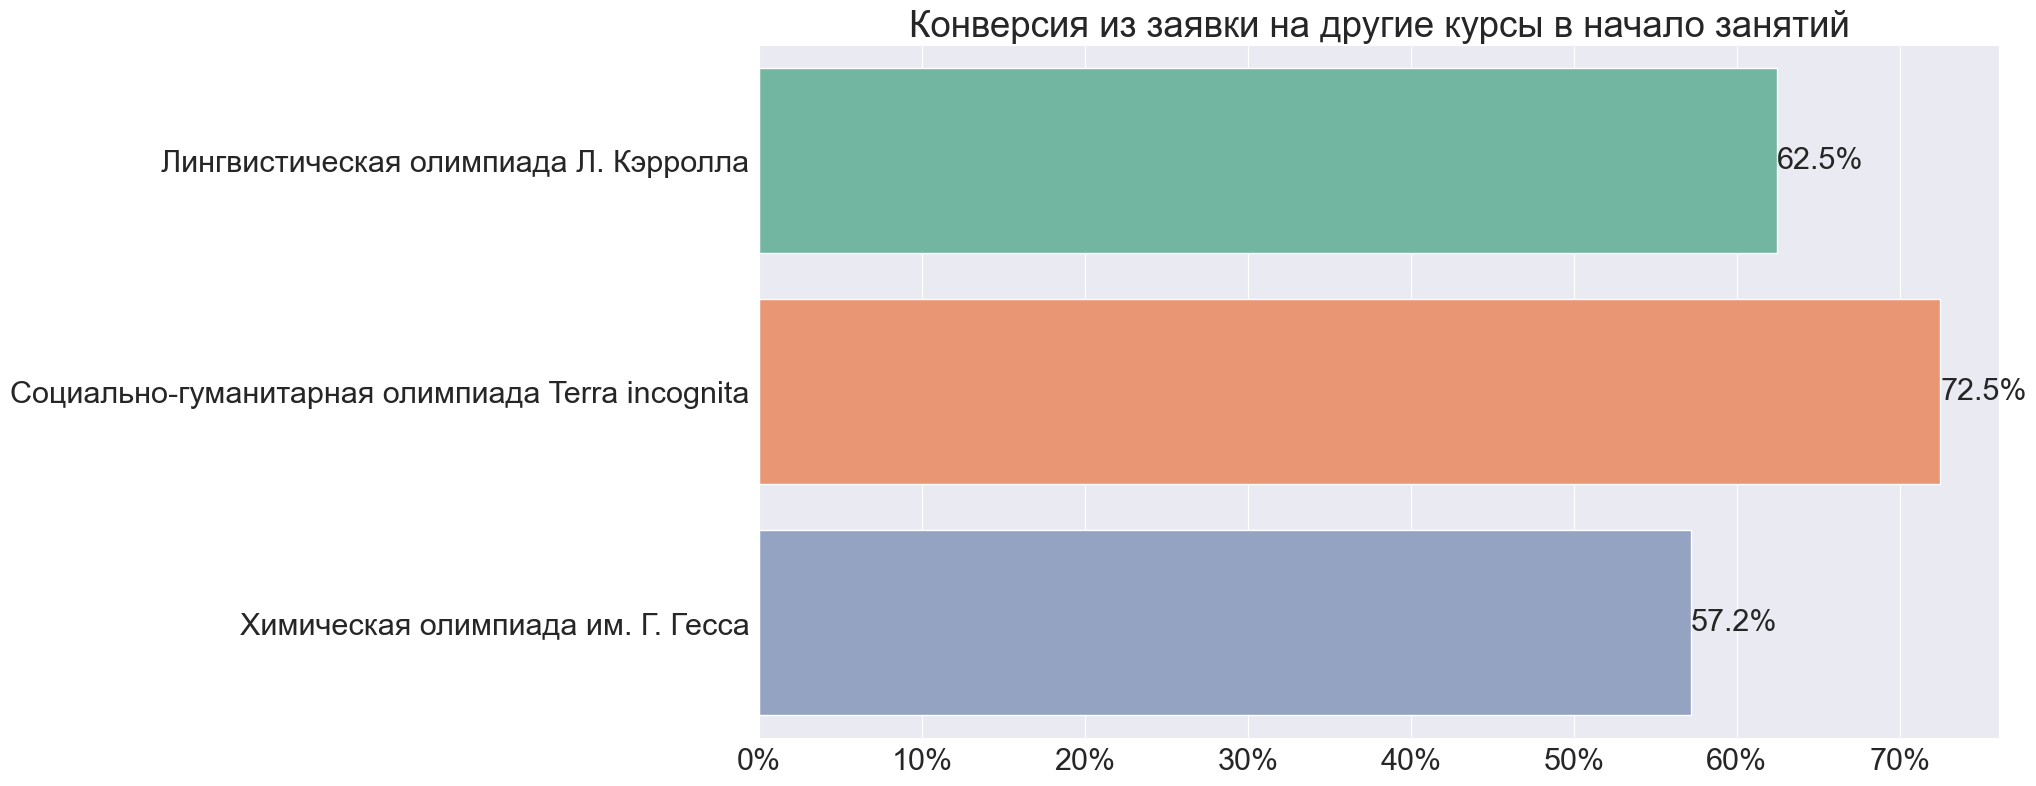

In [35]:

barplot_binary(data=df, y='course_name', x='at_least_one_course_les', orient='h',
               title='Конверсия из заявки на другие курсы в начало занятий')

<Axes: title={'center': 'Конверсия в завершение из начавших другой курс'}>

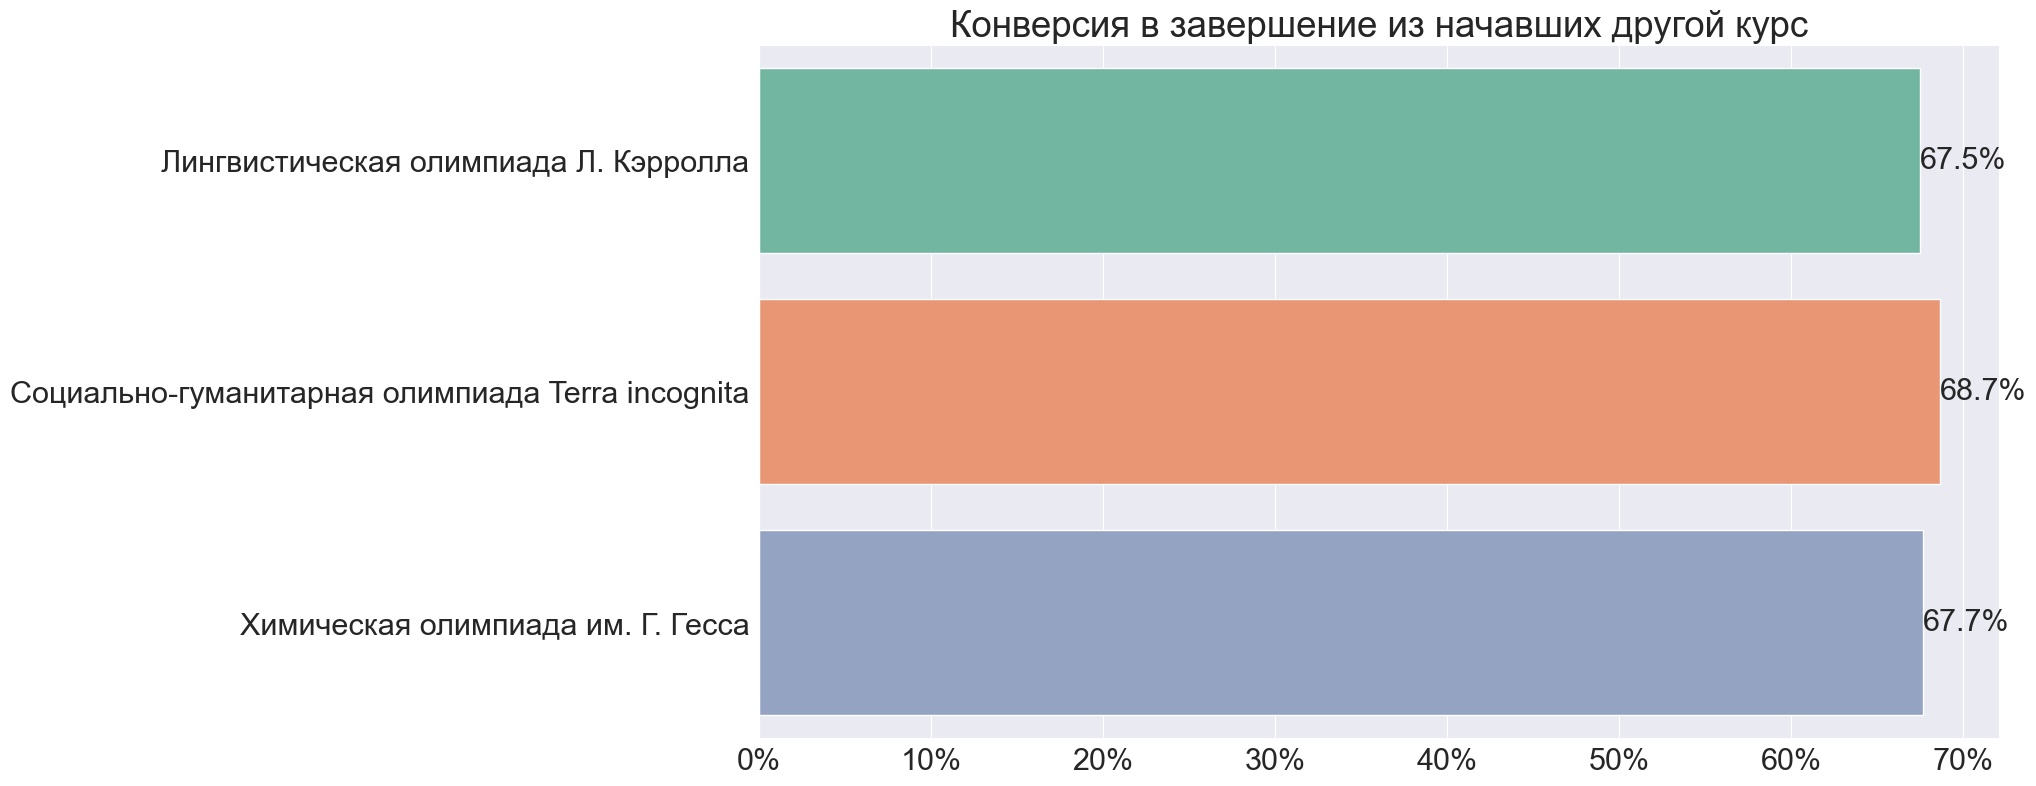

In [36]:
df.loc[df['at_least_one_course_les'] == 1 & df['course_comp'].isna(), 'course_comp'] = 0
barplot_binary(data=df, y='course_name', x='course_comp', orient='h',
               title='Конверсия в завершение из начавших другой курс')